<a href="https://colab.research.google.com/github/gargi510/Netflix_case_study/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION

With a global footprint and a constantly evolving content library, Netflix stands at the intersection of entertainment and data. But what guides its content choices — and how can data help us understand the underlying patterns that shape what we see on our screens?

## Reading the file and necessary imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the dataset (update the file path accordingly)
file_path = "/content/drive/MyDrive/Colab Notebooks/projects/netflix_titles.csv"  # Update with your file path
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Understanding the Data Structure

In [ ]:
# Display basic information about the dataset

print("\nDataset Preview:\n")
display(df.head())  # Show first 5 rows


Dataset Preview:



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Show column names
print("\nColumn Names:\n\n", df.columns.tolist())


Column Names:

 ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [ ]:
# Show data types and non-null counts

print("\nDataset Info:\n")
print(df.info())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [ ]:
# Check for missing values

print("\nMissing Values:\n")
print(df.isnull().sum())



Missing Values:

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
# Summary statistics

print("\nBasic Statistics:")
print(df.describe(include='all'))



Basic Statistics:
       show_id   type   title       director                cast  \
count     8807   8807    8807           6173                7982   
unique    8807      2    8807           4528                7692   
top      s8807  Movie  Zubaan  Rajiv Chilaka  David Attenborough   
freq         1   6131       1             19                  19   
mean       NaN    NaN     NaN            NaN                 NaN   
std        NaN    NaN     NaN            NaN                 NaN   
min        NaN    NaN     NaN            NaN                 NaN   
25%        NaN    NaN     NaN            NaN                 NaN   
50%        NaN    NaN     NaN            NaN                 NaN   
75%        NaN    NaN     NaN            NaN                 NaN   
max        NaN    NaN     NaN            NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7976             8797   8807.000000   8803      8804   
unique            

In [ ]:
# Checking the number of unique values in each column
print("\nUnique Values Count:")
print(df.nunique())



Unique Values Count:
show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64


## 📝 Initial Observations from Dataset Summary

- The dataset contains **8,807 rows**, with the index ranging from **0 to 8,806**.
- It includes **12 columns**:
  - Only `release_year` has an **integer** data type.
  - All other columns have the **object** data type.
- The following columns have **missing values** that need to be handled:
  - `director`, `cast`, `country`, `date_added`, `rating`, and `duration`.
- There are only two content types:
  - 🎬 **Movies**: 6,131 records (~70%)
  - 📺 **TV Shows**: 2,676 records (~30%)
- Only the columns **`show_id`** and **`title`** have **unique values** across all rows.
- 🎥 **Director Rajiv Chilaka** appears **19 times**, and **David Attenborough** is the most frequent name in the cast column, also appearing **19 times**.
- Each title may have **multiple cast members**, separated by commas — this will require **preprocessing**.
- We need to check for **duplicate titles with different directors** and resolve them if found.
- 📍 **United States** is the most frequently listed country, appearing in **2,818 records** (~35%).
- 🗓️ A total of **109 titles** were added to Netflix on **January 1, 2020**.
- 🎞️ The **release years** of titles range from **1925 to 2021**.
- 🔞 The most common content rating is **TV-MA**, associated with **3,207 titles**.
- ⏱️ The value **'1 Season'** appears **1,793 times** in the `duration` column — this reflects season count, not duration, and needs separate handling.
- 🏷️ There are **514 unique genre tags** in the `listed_in` column.
  - The most frequent genres include **"Dramas"** and **"International Movies"**.
- 🧾 One **description** appears **4 times**, which seems unusual and requires investigation.

---


## Data Preprocessing based on observations

### Unnesting Director, cast, listed_in and country columns

In [ ]:
#creating separate lines for each director vs title
constraint1=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df_new1=pd.DataFrame(constraint1,index=df['title'])
df_new1
df_new1=df_new1.stack()
df_new1=pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0:'Directors'},inplace=True)
df_new1.drop(['level_1'],axis=1,inplace=True)


#creating separate lines for each actor vs title
constraint2=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_new2=pd.DataFrame(constraint2,index=df['title'])
df_new2=df_new2.stack()
df_new2=pd.DataFrame(df_new2.reset_index())
df_new2.rename(columns={0:'Actors'},inplace=True)
df_new2.drop(['level_1'],axis=1,inplace=True)


#creating separate lines for each genre vs title
constraint3=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_new3=pd.DataFrame(constraint3,index=df['title'])
df_new3=df_new3.stack()
df_new3=pd.DataFrame(df_new3.reset_index())
df_new3.rename(columns={0:'Genre'},inplace=True)
df_new3.drop(['level_1'],axis=1,inplace=True)

#creating separate lines for each country vs title
constraint4=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_new4=pd.DataFrame(constraint4,index=df['title'])
df_new4=df_new4.stack()
df_new4=pd.DataFrame(df_new4.reset_index())
df_new4.rename(columns={0:'country'},inplace=True)
df_new4.drop(['level_1'],axis=1,inplace=True)



### Merging unnested columns and handling missing values of actor, director, country

In [ ]:
#merging the unnested director data with unnested actors data
df_new5=df_new2.merge(df_new1,on=['title'],how='inner')
#merging the above merged data with unnested genre data
df_new6=df_new5.merge(df_new3,on=['title'],how='inner')
#merging the above merged data with unnested country data
df_new=df_new6.merge(df_new4,on=['title'],how='inner')
#replacing nan values of director and actor by Unknown Actor and Director
df_new['Actors'].replace(['nan'],['Unknown Actor'],inplace=True)
df_new['Directors'].replace(['nan'],['Unknown Director'],inplace=True)
df_new['country'].replace(['nan'],[np.nan],inplace=True)
#df_new.head()

<ipython-input-238-27887b4be8ec>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['Actors'].replace(['nan'],['Unknown Actor'],inplace=True)
<ipython-input-238-27887b4be8ec>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

### Merging unnested data table with original table

In [ ]:
df_final=df_new.merge(df[['show_id', 'type', 'title', 'date_added',
 'release_year', 'rating', 'duration']],on=['title'],how='left')
df_final.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
#checking nulls
df_final.isnull().sum()

,0
title,0
Actors,0
Directors,0
Genre,0
country,11897
show_id,0
type,0
date_added,158
release_year,0
rating,67


### Checking and Handling Duration Column

In [ ]:
df_final['duration'].head()

,duration
0,90 min
1,2 Seasons
2,2 Seasons
3,2 Seasons
4,2 Seasons


In [ ]:
#check duration and title column
df_final[df_final['duration'].isnull()]

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
126537,Louis C.K. 2017,Louis C.K.,Louis C.K.,Movies,United States,s5542,Movie,"April 4, 2017",2017,74 min,NaN
131603,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,Movies,United States,s5795,Movie,"September 16, 2016",2010,84 min,NaN
131737,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,Movies,United States,s5814,Movie,"August 15, 2016",2015,66 min,NaN


1. For the 3 `null` values in the `duration` column, the `rating` column contains values that don't make sense in the `rating` column but are appropriate for the `duration` column. These values should be copied to the `duration` column.

2. To perform calculations, seasons need to be converted into a duration, and the 'min' string should be removed after every duration number.


In [ ]:
## Handling Duration

# Step 1: Copy 'rating' values to 'duration' where 'duration' is NaN, but avoid overwriting if 'rating' is also NaN
df_final.loc[df_final['duration'].isna() & df_final['rating'].notna(), 'duration'] = df_final.loc[df_final['duration'].isna() & df_final['rating'].notna(), 'rating']


In [ ]:
## Handling Rating

# Step 1: Identify rows where the 'rating' column contains values that are in the 'duration' column
df_final.loc[df_final['rating'].str.contains('min', na=False),'rating']='NR'

# Step 2: Convert all Na values to NR
df_final['rating'].fillna('NR',inplace=True)

# Display rating column
df_final['rating'].value_counts()


<ipython-input-244-deff8a92a570>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['rating'].fillna('NR',inplace=True)


,count
rating,
TV-MA,73867
TV-14,43931
R,25860
PG-13,16246
TV-PG,14926
PG,10919
TV-Y7,6304
TV-Y,3665
TV-G,2779


In [ ]:
#checking nulls
df_final.isna().sum()

,0
title,0
Actors,0
Directors,0
Genre,0
country,11897
show_id,0
type,0
date_added,158
release_year,0
rating,0


### Imputation of `date_added` and `country` Columns

- **Imputation of `date_added`:**  
  The missing values in the `date_added` column are imputed based on the most frequent `date_added` value within the same `release_year`. This ensures that the imputation aligns with the historical patterns of data addition for movies and TV shows released in the same year.

- **Imputation of `country`:**  
  For the `country` column, the imputation is performed using the following logic:
  - If a director has only one movie in the dataset, the country value for the missing entries is imputed based on the actor(s) associated with the movie. This is done by identifying the country where the actor(s) primarily work.
  - If a director has multiple movies in the dataset, the country value for the missing entries is imputed based on the most common country associated with that director’s other movie titles.
  
- **Default Imputation for Remaining Missing Values:**  
  For any remaining rows where the `country` value is still missing (after attempting director-based and actor-based imputations), the country is imputed with the default value **"Unknown Country"**.

This approach ensures that missing data is handled in a meaningful and contextually appropriate manner based on the relationships between directors, actors, and countries.


In [ ]:
#observe nulls in date_added column
df_final[df_final['date_added'].isnull()]


,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
136893,A Young Doctor's Notebook and Other Stories,Daniel Radcliffe,Unknown Director,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136894,A Young Doctor's Notebook and Other Stories,Daniel Radcliffe,Unknown Director,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136895,A Young Doctor's Notebook and Other Stories,Daniel Radcliffe,Unknown Director,TV Dramas,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136896,A Young Doctor's Notebook and Other Stories,Jon Hamm,Unknown Director,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136897,A Young Doctor's Notebook and Other Stories,Jon Hamm,Unknown Director,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136898,A Young Doctor's Notebook and Other Stories,Jon Hamm,Unknown Director,TV Dramas,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136899,A Young Doctor's Notebook and Other Stories,Adam Godley,Unknown Director,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136900,A Young Doctor's Notebook and Other Stories,Adam Godley,Unknown Director,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136901,A Young Doctor's Notebook and Other Stories,Adam Godley,Unknown Director,TV Dramas,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136902,A Young Doctor's Notebook and Other Stories,Christopher Godwin,Unknown Director,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons


In [ ]:
# Impute 'date_added' based on the mode (most frequent value) of the 'date_added' for the same release_year
for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():
    # Get the mode of 'date_added' for the given 'release_year'
    imp = df_final[df_final['release_year'] == i]['date_added'].mode().values[0]

    # Impute the missing 'date_added' with the corresponding mode for that release year
    df_final.loc[df_final['release_year'] == i, 'date_added'] = df_final.loc[df_final['release_year'] == i, 'date_added'].fillna(imp)

# Display the DataFrame after imputation
df_final.head()


,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
# Loop through rows where 'country' is missing, based on 'Directors'
for i in df_final[df_final['country'].isnull()]['Directors'].unique():
    # Check if the director appears in rows where 'country' is not null
    if i in df_final[~df_final['country'].isnull()]['Directors'].unique():
        # Impute the 'country' based on the most frequent country for the given director
        imp = df_final[df_final['Directors'] == i]['country'].mode().values[0]
        # Assign the imputed country value to all rows with this director
        df_final.loc[df_final['Directors'] == i, 'country'] = imp

# Loop through rows where 'country' is missing, based on 'Actors'
for i in df_final[df_final['country'].isnull()]['Actors'].unique():
    # Check if the actor appears in rows where 'country' is not null
    if i in df_final[~df_final['country'].isnull()]['Actors'].unique():
        # Impute the 'country' based on the most frequent country for the given actor
        imp = df_final[df_final['Actors'] == i]['country'].mode().values[0]
        # Assign the imputed country value to all rows with this actor
        df_final.loc[df_final['Actors'] == i, 'country'] = imp

# If there are still nulls in the 'country' column, fill them with 'Unknown Country'
df_final['country'].fillna('Unknown Country', inplace=True)


<ipython-input-248-4904e3fbef91>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['country'].fillna('Unknown Country', inplace=True)


### Final Dataset Overview

In [ ]:
df_final.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
# Check formissing values
df_final.isnull().sum()

,0
title,0
Actors,0
Directors,0
Genre,0
country,0
show_id,0
type,0
date_added,0
release_year,0
rating,0


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201991 entries, 0 to 201990
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         201991 non-null  object
 1   Actors        201991 non-null  object
 2   Directors     201991 non-null  object
 3   Genre         201991 non-null  object
 4   country       201991 non-null  object
 5   show_id       201991 non-null  object
 6   type          201991 non-null  object
 7   date_added    201991 non-null  object
 8   release_year  201991 non-null  int64 
 9   rating        201991 non-null  object
 10  duration      201991 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.0+ MB


- The dataset contains **201,991 records**.
- There are **11 columns**, indexed from **0 to 10**.
- The data types of the columns:
  - **`release_dt`**: `int`


##Exploratory Data analysis

###Analyzing Duration

In [ ]:
df_final['duration'].value_counts()

,count
duration,
1 Season,35035
2 Seasons,9559
3 Seasons,5084
94 min,4343
106 min,4040
97 min,3624
95 min,3560
96 min,3484
93 min,3480


As the duration is present both in min we observe min is provided for movies and season is provided for series.
To move further we will have to split the duration data separate for movies and series.
once that is done we will analyze both and give our result.

In [ ]:
# Separate Movies and TV Shows
movies_df = df_final[df_final['duration'].str.contains('min', na=False)].copy()  # Movies contain 'min'
tv_shows_df = df_final[df_final['duration'].str.contains('Season', na=False)].copy()  # TV Shows contain 'Season'

# Remove ' min' and convert to integer for movie duration (cleaning step)
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Extract number of seasons for TV Shows
tv_shows_df['seasons'] = tv_shows_df['duration'].str.extract('(\d+)').astype(int)


🎬 Movie Duration Statistics:
count    145843.00000
mean        106.85579
std          24.69672
min           3.00000
25%          93.00000
50%         104.00000
75%         119.00000
max         312.00000
Name: duration_min, dtype: float64


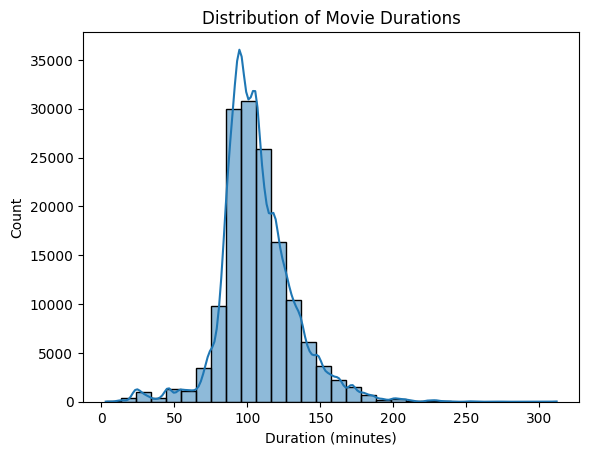

In [ ]:
# Movie duration statistics
movie_duration_stats = movies_df['duration_min'].describe()

# Display the statistics
print("🎬 Movie Duration Statistics:")
print(movie_duration_stats)

# Visualization: Histogram of movie durations
sns.histplot(movies_df['duration_min'], bins=30, kde=True)
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()


📺 TV Show Seasons Statistics:
count    56148.000000
mean         1.928101
std          1.811729
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         17.000000
Name: seasons, dtype: float64


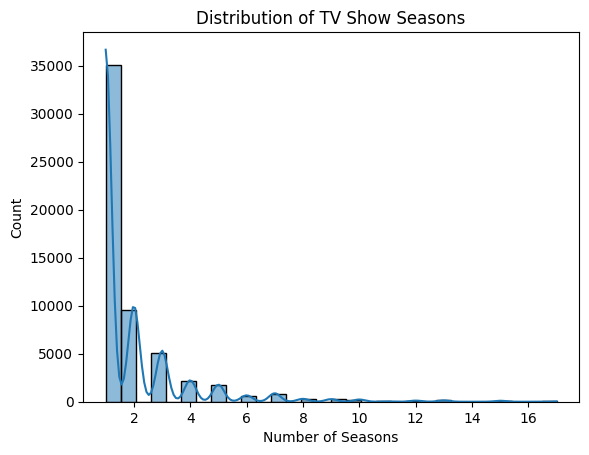

In [ ]:
# TV Show Season Statistics
tv_show_seasons_stats = tv_shows_df['seasons'].describe()

# Display the statistics
print("📺 TV Show Seasons Statistics:")
print(tv_show_seasons_stats)

# Visualization: Histogram of TV show seasons
sns.histplot(tv_shows_df['seasons'], bins=30, kde=True)
plt.title("Distribution of TV Show Seasons")
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.show()


🎬 Average Movie Duration: 106.85579013048277 minutes
📺 Average TV Show Seasons: 1.9281007337750231 seasons


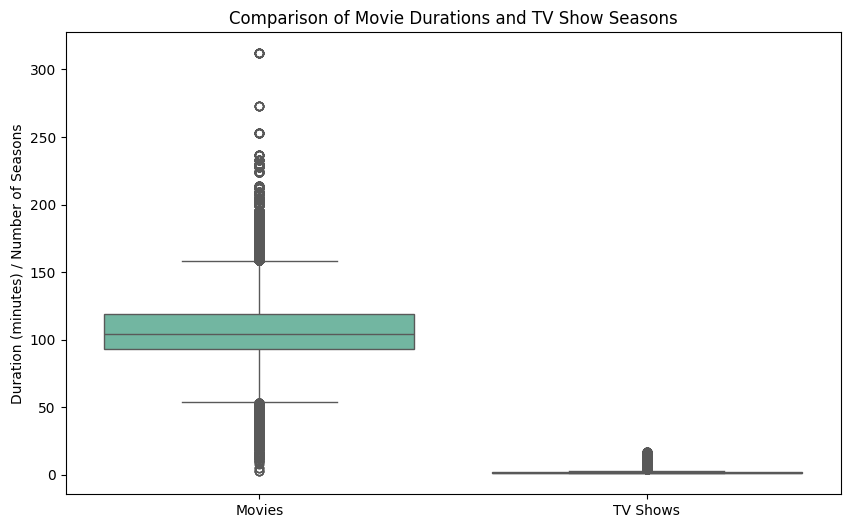

In [ ]:
# Calculate average duration for Movies and TV Shows
average_movie_duration = movies_df['duration_min'].mean()
average_tv_show_seasons = tv_shows_df['seasons'].mean()

print(f"🎬 Average Movie Duration: {average_movie_duration} minutes")
print(f"📺 Average TV Show Seasons: {average_tv_show_seasons} seasons")

# Create a box plot to compare durations
plt.figure(figsize=(10, 6))
sns.boxplot(data=[movies_df['duration_min'], tv_shows_df['seasons']], palette="Set2")

# Set the x-axis labels manually
plt.xticks([0, 1], ['Movies', 'TV Shows'])

plt.title("Comparison of Movie Durations and TV Show Seasons")
plt.ylabel("Duration (minutes) / Number of Seasons")
plt.show()




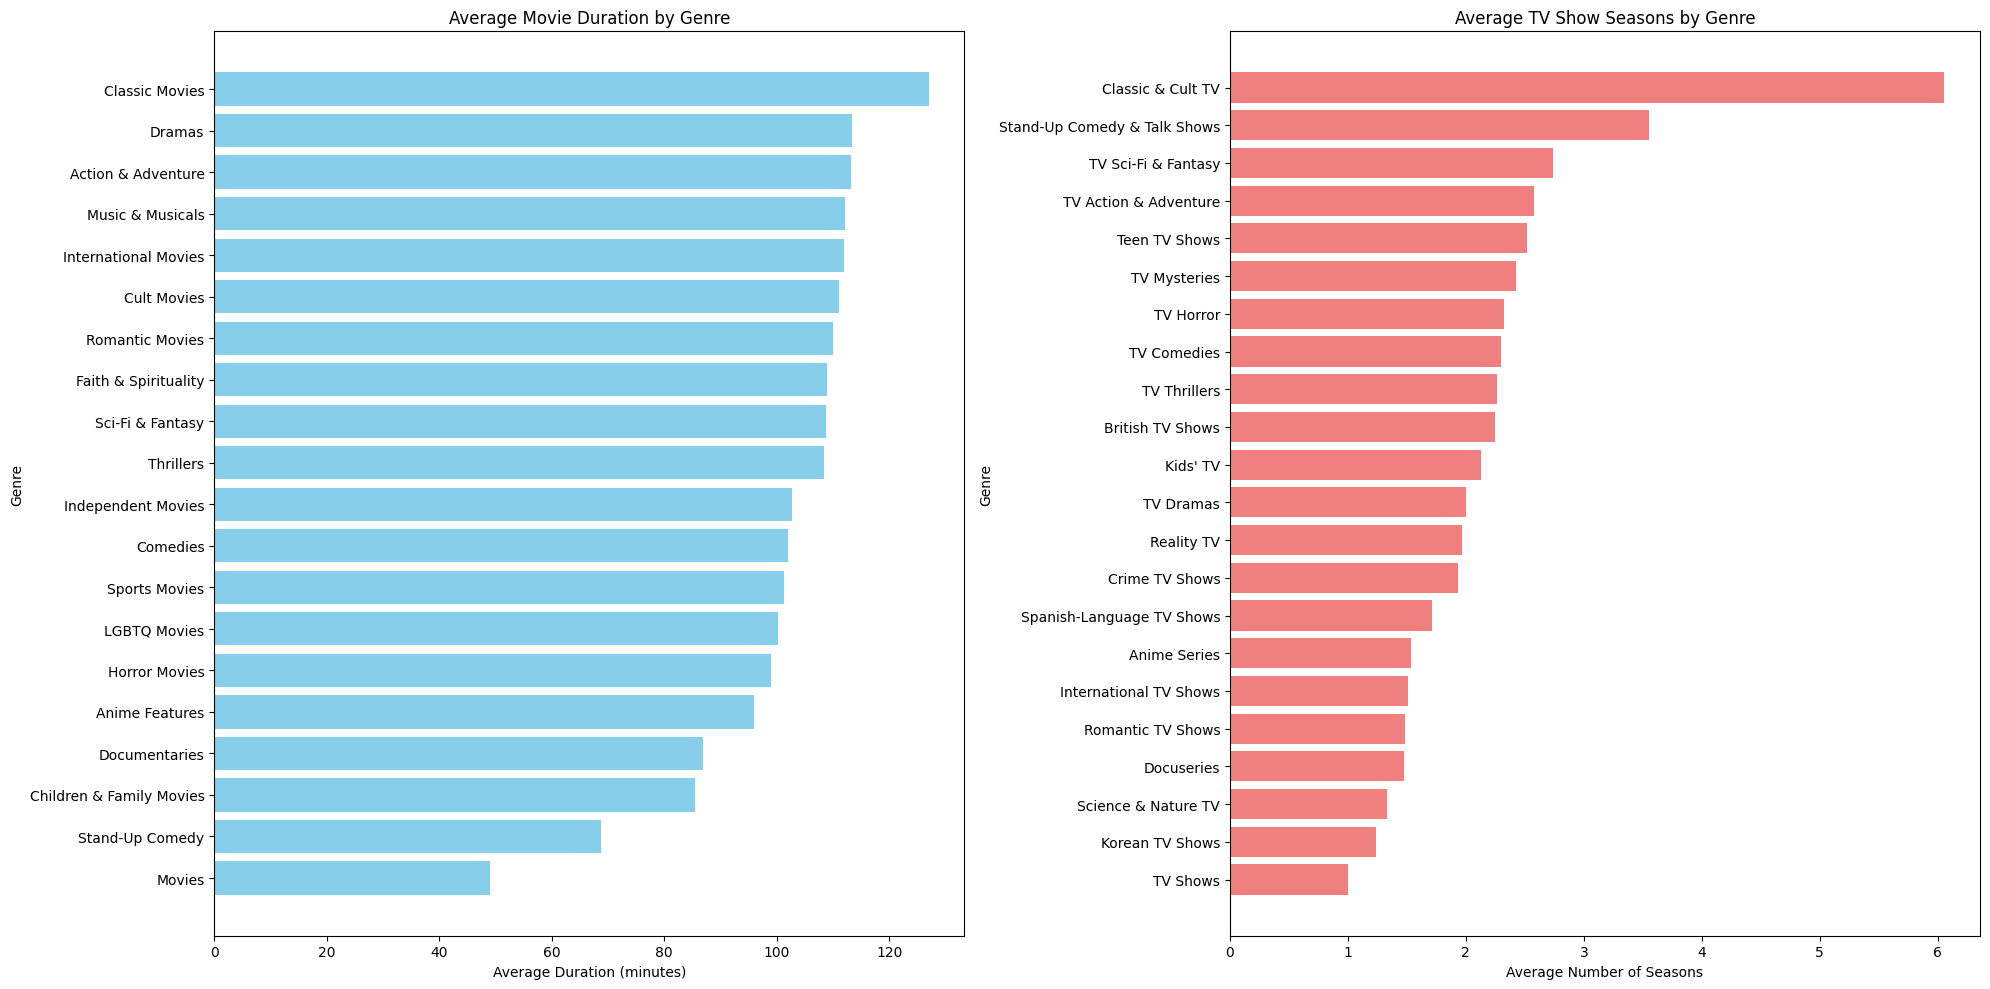

In [ ]:
# Genre wise distribution of Average duration Movies and TV shows
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Average duration by genre for Movies, sorted in increasing order
movie_genre_avg_duration = movies_df.groupby('Genre')['duration_min'].mean().sort_values(ascending=True)
ax[0].barh(movie_genre_avg_duration.index, movie_genre_avg_duration.values, color='skyblue')
ax[0].set_title('Average Movie Duration by Genre')
ax[0].set_xlabel('Average Duration (minutes)')
ax[0].set_ylabel('Genre')

# Average number of seasons by genre for TV Shows, sorted in increasing order
tv_show_genre_avg_seasons = tv_shows_df.groupby('Genre')['seasons'].mean().sort_values(ascending=True)
ax[1].barh(tv_show_genre_avg_seasons.index, tv_show_genre_avg_seasons.values, color='lightcoral')
ax[1].set_title('Average TV Show Seasons by Genre')
ax[1].set_xlabel('Average Number of Seasons')
ax[1].set_ylabel('Genre')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


 **Interpretation - Average Movie Duration by Genre (Left Chart)**

- **Classic Movies**: This genre has the **highest average movie duration**, significantly longer than other genres. This suggests that classic films tend to be longer on average.
- **Dramas**: Dramas also have a relatively **high average duration**, indicating that they tend to be longer films.
- **Action & Adventure, Music & Musicals, International Movies, Cult Movies, Romantic Movies, Faith & Spirituality, Sci-Fi & Fantasy, Thrillers**: These genres have a **moderate average duration**

----

 **Interpretation - Average TV Show Seasons by Genre (Right Chart)**

- **Classic & Cult TV**: This genre has the **highest average number of seasons**. This could indicate that classic or cult TV shows tend to have longer runs or are revived for multiple seasons.
- **Stand-Up Comedy & Talk Shows, TV Sci-Fi & Fantasy, TV Action & Adventure, Teen TV Shows, TV Mysteries, TV Horror, TV Comedies, TV Thrillers, British TV Shows, Kids' TV, TV Dramas, Reality TV, Crime TV Shows, Spanish-Language TV Shows, Anime Series, International TV Shows, Romantic TV Shows, Documentaries, Science & Nature TV, Korean TV Shows**: These genres have a **moderate average number of seasons**, falling within a similar range.
- **TV Shows (Overall)**: This category, representing the average for all TV shows, has the **lowest average number of seasons**.

**Insights**: This chart shows that **classic** and **cult TV shows** tend to have longer runs, while other genres have a more moderate average number of seasons. The average for all TV shows is relatively low, suggesting a prevalence of **shorter-run series**.

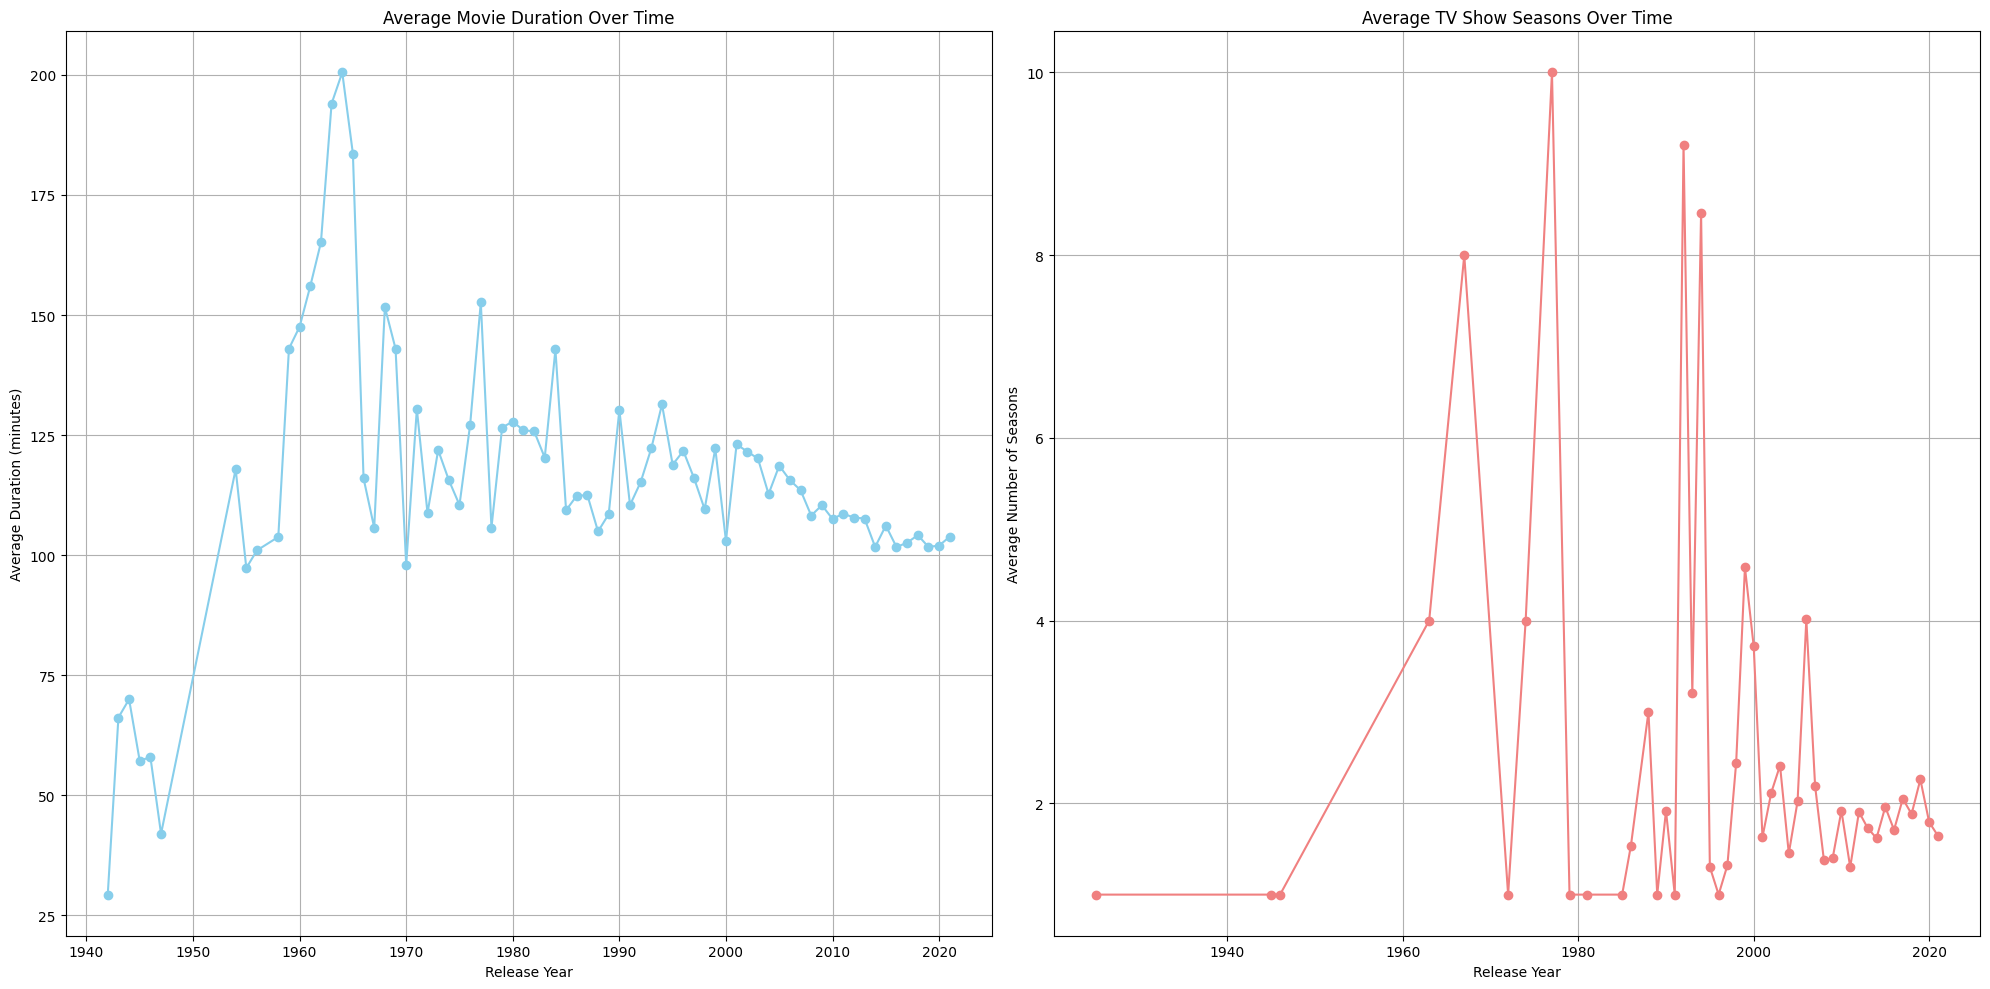

In [ ]:
# Average movie duration over the years
avg_movie_duration_by_year = movies_df.groupby('release_year')['duration_min'].mean()

# Average number of seasons over the years
avg_tv_show_seasons_by_year = tv_shows_df.groupby('release_year')['seasons'].mean()

# Create subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot Average Movie Duration Over Time
ax[0].plot(avg_movie_duration_by_year.index, avg_movie_duration_by_year.values, color='skyblue', marker='o')
ax[0].set_title('Average Movie Duration Over Time')
ax[0].set_xlabel('Release Year')
ax[0].set_ylabel('Average Duration (minutes)')
ax[0].grid(True)

# Plot Average TV Show Seasons Over Time
ax[1].plot(avg_tv_show_seasons_by_year.index, avg_tv_show_seasons_by_year.values, color='lightcoral', marker='o')
ax[1].set_title('Average TV Show Seasons Over Time')
ax[1].set_xlabel('Release Year')
ax[1].set_ylabel('Average Number of Seasons')
ax[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


## Interpretation of Duration and Seasons Trends

### Average Movie Duration Over Time (Left Plot):

- **Early Years (1940s-1950s)**:
  - The average movie duration starts relatively low, around **50-75 minutes**.
  - This might reflect a different style of filmmaking or shorter films being more common in that era.

- **Peak in the 1960s**:
  - There's a dramatic increase in average movie duration, peaking around **200 minutes** in the mid-1960s.
  - This could be due to the rise of **epic films**, longer dramas, or changing production techniques.

- **Fluctuation and Decline (1970s-2000s)**:
  - The average duration fluctuates, but with a general **downward trend**.
  - It stabilizes around **100-125 minutes** in the later years.

- **Recent Trend (2000s-2020s)**:
  - The average duration seems to have plateaued or slightly decreased, hovering around **100 minutes**.

#### Insights:
This plot suggests that **movie lengths** have varied significantly over time, with a notable **peak in the 1960s** and a general trend towards shorter or more consistent durations in recent years.

---

### Average TV Show Seasons Over Time (Right Plot):

- **Early Years (1940s-1970s)**:
  - The average number of seasons is very low, close to **1**.
  - This could be due to **data limitations** (fewer TV shows in the dataset from that period) or a different model of television production (more limited-run series).

- **Significant Peaks (1980s-2000s)**:
  - There are **two major peaks** in the average number of seasons, one in the late **1980s** and another around **2000**.
  - These peaks show a dramatic increase in the average number of seasons to around **8-10**.

- **Recent Trend (2000s-2020s)**:
  - The average number of seasons has **declined slightly** but remains higher than in the early years.
  - It seems to stabilize around **2 seasons** on average.

#### Insights:
This plot shows a significant increase in the **average number of seasons** for TV shows in the late 20th and early 21st centuries. However, in recent years, there seems to be a trend towards **shorter-run shows** or more **limited series**.

---


<ipython-input-259-11bdf7f2bae4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='duration_min', data=movies_df, palette='coolwarm', ax=ax[0])
<ipython-input-259-11bdf7f2bae4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='seasons', data=tv_shows_df, palette='coolwarm', ax=ax[1])


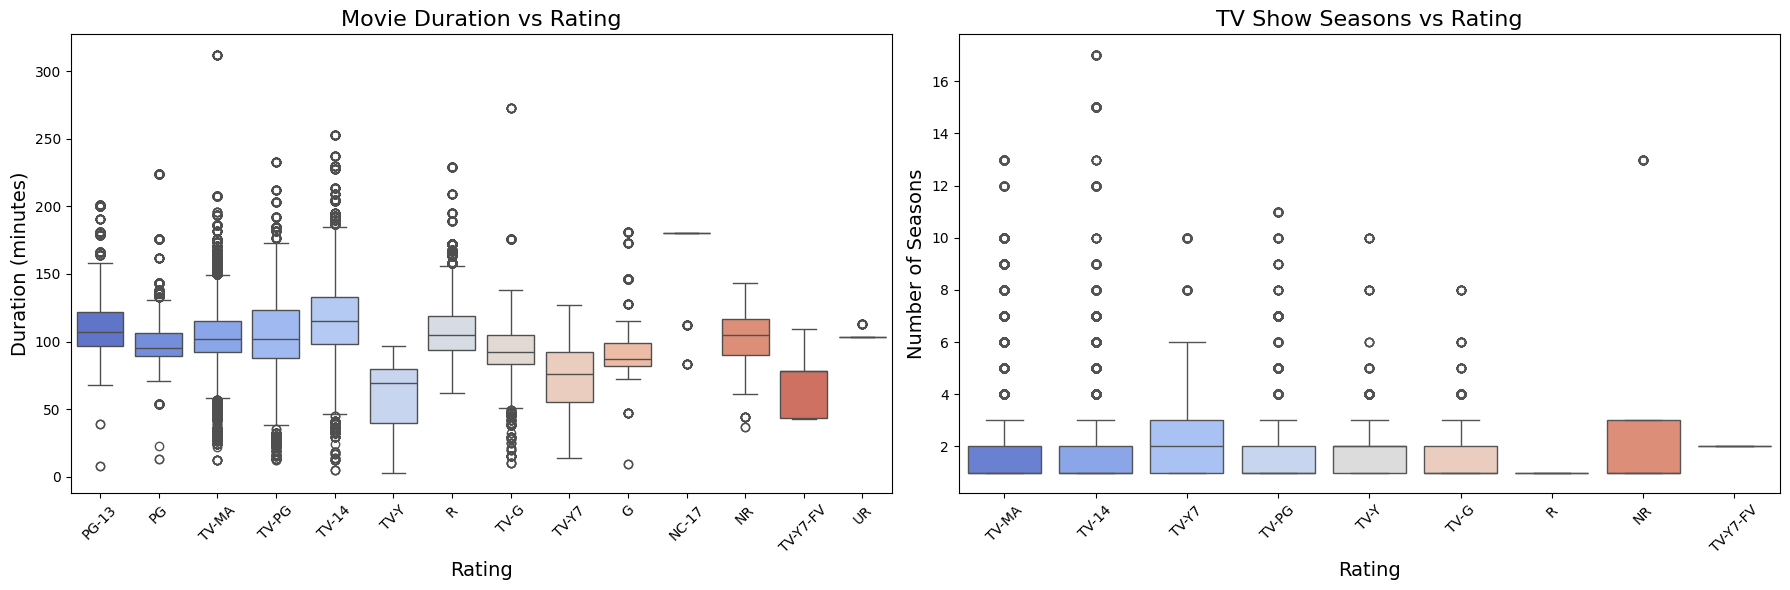

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns

# Box plot for Movie Duration vs Rating
sns.boxplot(x='rating', y='duration_min', data=movies_df, palette='coolwarm', ax=ax[0])
ax[0].set_title('Movie Duration vs Rating', fontsize=16)
ax[0].set_xlabel('Rating', fontsize=14)
ax[0].set_ylabel('Duration (minutes)', fontsize=14)
ax[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Box plot for TV Show Seasons vs Rating
sns.boxplot(x='rating', y='seasons', data=tv_shows_df, palette='coolwarm', ax=ax[1])
ax[1].set_title('TV Show Seasons vs Rating', fontsize=16)
ax[1].set_xlabel('Rating', fontsize=14)
ax[1].set_ylabel('Number of Seasons', fontsize=14)
ax[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Interpretation of Duration vs Rating and Season Lengths by Rating

 **Movie Rating and Duration**
- There's **no strong linear relationship** between **movie rating** and **duration**.
- However, certain ratings (**PG-13**, **PG**, **TV-MA**, **TV-14**, and **R**) tend to have a **wider range of durations** and a **higher median**, indicating a greater variability in movie lengths for these categories.
  - This suggests that these categories may include a broader variety of film types, from shorter films to more epic productions, leading to this greater variability.

---

 **Mature Content and Season Length (TV Shows)**
- TV shows with **mature content ratings** (**TV-MA**, **TV-14**) tend to have a **wider range of season counts**, suggesting that these shows might have **more complex storylines** or **longer-running arcs**.
  - These TV shows are likely to be more complex in narrative structure, resulting in a need for more seasons to properly develop the plot and characters.

---

### **Children's Content and Season Length (TV Shows)**
- TV shows with ratings aimed at younger audiences (**TV**


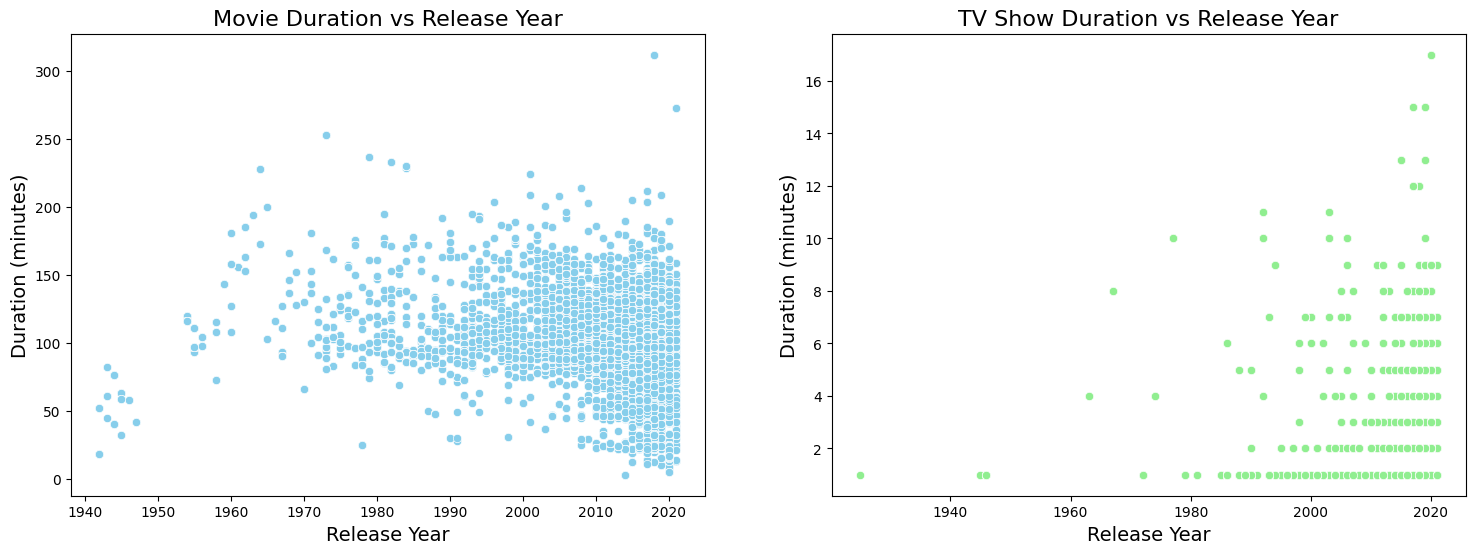

<Figure size 640x480 with 0 Axes>

In [ ]:
# Create subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# 1. Scatter plot: Duration vs Release Year for Movies
sns.scatterplot(x='release_year', y='duration_min', data=movies_df, ax=ax[0], color='skyblue')
ax[0].set_title('Movie Duration vs Release Year', fontsize=16)
ax[0].set_xlabel('Release Year', fontsize=14)
ax[0].set_ylabel('Duration (minutes)', fontsize=14)

sns.scatterplot(x='release_year', y='seasons', data=tv_shows_df, color='lightgreen')
plt.title('TV Show Duration vs Release Year', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Duration (minutes)', fontsize=14)
plt.show()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



 **Movies**
- **Movie durations** have been quite **variable over time**, with a concentration in the "**standard**" 80-150 minute range.
  - In earlier years, movies were generally shorter, but over time, the industry has seen a rise in longer, epic films, though the majority of movies still remain within the typical 80-150 minute duration.
  - This variability might reflect changes in audience preferences, storytelling styles, and advancements in film production techniques.

---

 **TV Shows**
- There's a **clear trend towards more seasons in recent TV shows**, reflecting changes in the **television industry**.
  - TV shows have evolved from limited-run series to longer, multi-season shows, often due to the success of platforms like Netflix, where viewers prefer watching entire seasons at once.
  - This trend may also reflect shifts in how TV shows are produced and consumed, with more emphasis


<ipython-input-261-9a6f33d21888>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='decade', y='duration_min', data=movies_df, ax=ax[0], palette="Set2")
<ipython-input-261-9a6f33d21888>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='decade', y='seasons', data=tv_shows_df, ax=ax[1], palette="Set1")


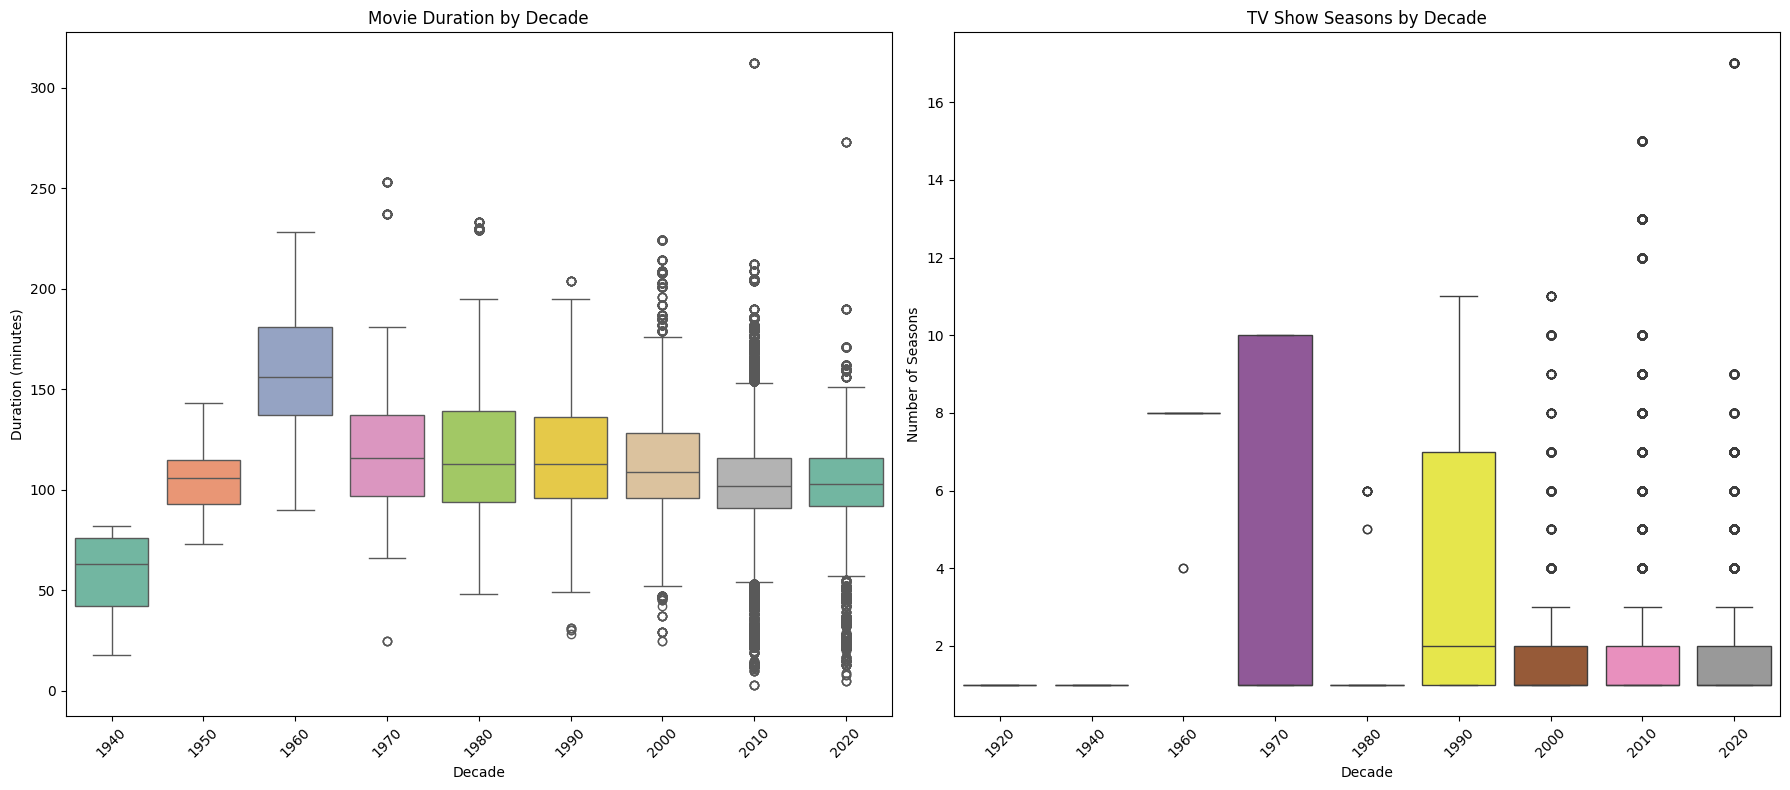

Correlation between release year and movie duration: -0.24
Correlation between release year and TV show seasons: -0.07


In [ ]:
movies_df['decade'] = (movies_df['release_year'] // 10) * 10
tv_shows_df['decade'] = (tv_shows_df['release_year'] // 10) * 10

# 1. Plot Duration by Decade for Movies and TV Shows
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Movie Duration by Decade
sns.boxplot(x='decade', y='duration_min', data=movies_df, ax=ax[0], palette="Set2")
ax[0].set_title('Movie Duration by Decade')
ax[0].set_xlabel('Decade')
ax[0].set_ylabel('Duration (minutes)')
ax[0].tick_params(axis='x', rotation=45)

# TV Show Duration by Decade
sns.boxplot(x='decade', y='seasons', data=tv_shows_df, ax=ax[1], palette="Set1")
ax[1].set_title('TV Show Seasons by Decade')
ax[1].set_xlabel('Decade')
ax[1].set_ylabel('Number of Seasons')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 2. Calculate Correlation between Release Year and Duration for Movies and TV Shows

# Correlation for Movies: release_year vs duration
movie_corr = movies_df[['release_year', 'duration_min']].corr().iloc[0, 1]

# Correlation for TV Shows: release_year vs number of seasons
tv_show_corr = tv_shows_df[['release_year', 'seasons']].corr().iloc[0, 1]

# Print correlations
print(f"Correlation between release year and movie duration: {movie_corr:.2f}")
print(f"Correlation between release year and TV show seasons: {tv_show_corr:.2f}")

**Left Chart: Movie Duration by Decade:**
- **X-Axis**: **Decade** - Represents the release decade of the movies (e.g., 1940s, 1950s, etc.).
- **Y-Axis**: **Duration (minutes)** - Represents the length of the movies in minutes.

 **Observations:**
- **1940s & 1950s**: These decades show the shortest median durations, with a narrower range. Movies from these periods tend to be relatively shorter in length.
- **1960s & 1970s**: There's a noticeable increase in median duration and a wider range compared to the earlier decades, indicating that movies became longer and more diverse in length during this time.
- **1980s & 1990s**: The median duration remains relatively high but slightly decreases compared to the peak in the 1960s/70s. Movie lengths were still long, but the trend of extreme movie durations began to taper off.
- **2000s, 2010s, & 2020s**: The median duration seems to stabilize and slightly decrease, with a wider spread of data points. While some movies are shorter, others are much longer, showing a greater variation in movie length in recent years.
- **Outliers**: Numerous outliers, particularly in the later decades, indicate a wider variety of movie lengths, with some films being significantly shorter or longer than the typical range.

 **Insights:**
- Movie durations show a trend of increasing in the mid-20th century, peaking in the 1960s/70s, and then stabilizing or slightly decreasing in recent decades.
- The wide range of durations in later decades indicates a greater diversity in movie lengths, reflecting the changing nature of the film industry and audience preferences

---

### Right Chart: TV Show Seasons by Decade:
- **X-Axis**: **Decade** - Represents the release decade of the TV shows.
- **Y-Axis**: **Number of Seasons** - Represents the number of seasons for the TV shows.

#### Observations:
- **1970s**: The data for the 1970s shows a high median and a wide range of season counts. However, it is important to note the data sparsity for this decade, which could impact the overall trend.
- **1980s**: A similar pattern is observed for the 1980s with a high median and a wide range. TV shows during this decade had a tendency to have longer runs, with varying numbers of seasons.
- **1990s**: The median decreases, and the range becomes narrower, indicating that shows began to have shorter runs on average during this decade.
- **2000s, 2010s, & 2020s**: The median remains low, and the range is relatively narrow, with a few outliers. This suggests that more recent TV shows tend to have fewer seasons on average.
- **Data Sparsity**: There is very limited or missing data for the decades before the 1970s, which could affect the analysis for earlier years.

#### Insights:
- TV shows from the 1970s and 1980s appear to have had a tendency for longer runs, but this might be influenced by data sparsity.
- In recent decades, the number of seasons has generally decreased, with more shows having shorter runs, possibly due to changing production models or audience preferences.

---

**Correlation Values Interpretation**

Correlation between Release Year and Movie Duration: **-0.24**

- **Negative Correlation**: This indicates a weak negative correlation between release year and movie duration. In other words, while there is a slight tendency for movie durations to decrease over time, the relationship is not strong.
- **Strength**: The correlation is relatively weak, suggesting that factors other than the release year might be influencing movie duration.
- **Consistency with Box Plots**: This weak negative correlation aligns with the box plots, which show a general trend of decreasing duration in later decades, but with a lot of variation. The data points in recent decades still show a wide range of durations.

---

Correlation between Release Year and TV Show Seasons: **-0.07**

- **Weak Negative Correlation**: This indicates a very weak negative correlation between release year and TV show seasons. There is practically no linear relationship between release year and the number of seasons.
- **Strength**: The correlation is extremely weak, suggesting that the number of seasons in a TV show is not strongly influenced by the release year.
- **Consistency with Box Plots**: This weak correlation is consistent with the box plots, which show a less clear trend and more variability in season counts over time. TV shows from different decades show a broad range of season counts, making the correlation weak.

---

These analyses and visualizations provide insights into how both movie durations and TV show season lengths have evolved over time. While trends such as increasing movie lengths in the mid-20th century and decreasing season counts for recent TV shows are evident, the correlations indicate that other factors may be influencing these patterns beyond just the release year.


##Analyzing Genre vs Title

In [ ]:
from datetime import datetime
from dateutil.parser import parse

arr = []
for i in df_final['date_added'].values:
    dt1 = parse(i)
    arr.append(dt1.strftime('%Y-%m-%d'))

# Add the modified date column
df_final['Modified_Added_date'] = arr
df_final['Modified_Added_date'] = pd.to_datetime(df_final['Modified_Added_date'])

# Extract the month, week, and year from the date
df_final['month_added'] = df_final['Modified_Added_date'].dt.month
df_final['week_added'] = df_final['Modified_Added_date'].dt.isocalendar().week  # Use isocalendar() for ISO week
df_final['year'] = df_final['Modified_Added_date'].dt.year

df_final.head()


,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_added,year,has_non_digit
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,2021-09-25,9,38,2021,False
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,230s,2021-09-24,9,38,2021,True
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,230s,2021-09-24,9,38,2021,True
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,230s,2021-09-24,9,38,2021,True
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,230s,2021-09-24,9,38,2021,True


In [ ]:
#Titles such as Bahubali(Hindi Version),Bahubali(Tamil Version) were there. Since it
#presence of brackets and content between brackets is removed.
df_final['title']=df_final['title'].str.replace(r"\(.*\)","")
df_final.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_added,year
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min,2021-09-25,9,38,2021
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


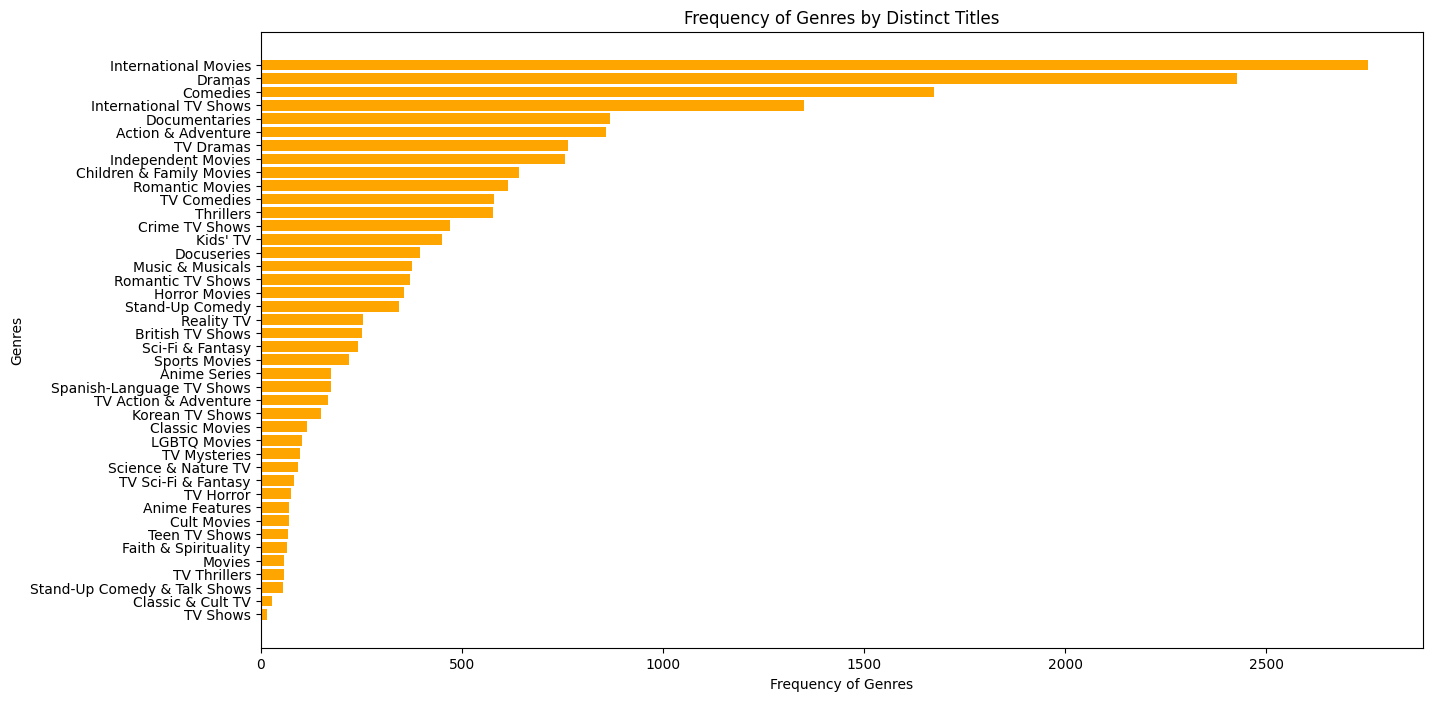

In [ ]:
# Group by Genre and count the number of distinct titles
df_genre = df_final.groupby(['Genre']).agg({"title": "nunique"}).reset_index().sort_values(by=['title'], ascending=False)

# Plot the bar chart
plt.figure(figsize=(15, 8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'], color='orange')
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.title('Frequency of Genres by Distinct Titles')
plt.show()


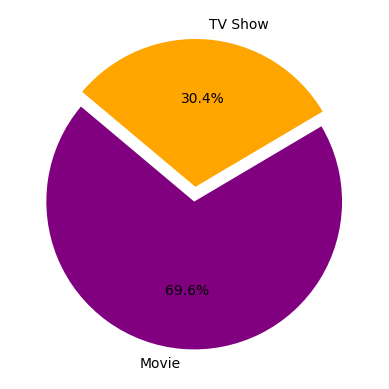

In [ ]:
# Group by type and count the number of distinct titles
df_type = df_final.groupby(['type']).agg({"title": "nunique"}).reset_index()

# Plot pie chart
plt.pie(df_type['title'], explode=(0.05, 0.05), labels=df_type['type'], colors=['purple', 'orange'], autopct='%1.1f%%', startangle=140)

# Display the plot
plt.show()


In [ ]:
#number of distinct titles on the basis of country
df_final.groupby(['country']).agg({"title":"nunique"})

,title
country,
,2
Afghanistan,1
Albania,1
Algeria,3
Angola,1
Argentina,91
Armenia,1
Australia,160
Austria,12


The above dataframe shows a flaw in which we are seeing countries, such as Cambodia and Cambodia, or
United States and United States, are shown as different countries.They should have been same


In [ ]:
# Clean the 'country' column by removing commas
df_final['country'] = df_final['country'].str.replace(',', '')

# Group by country and count the number of distinct titles
df_country = df_final.groupby(['country']).agg({"title": "nunique"}).reset_index()

# Sort the values by the number of titles in descending order
df_country = df_country.sort_values(by="title", ascending=False)


In [ ]:
#number of distinct titles on the basis of country
df_final.groupby(['country']).agg({"title":"nunique"}).head()

,title
country,
,2
Afghanistan,1
Albania,1
Algeria,2
Angola,3


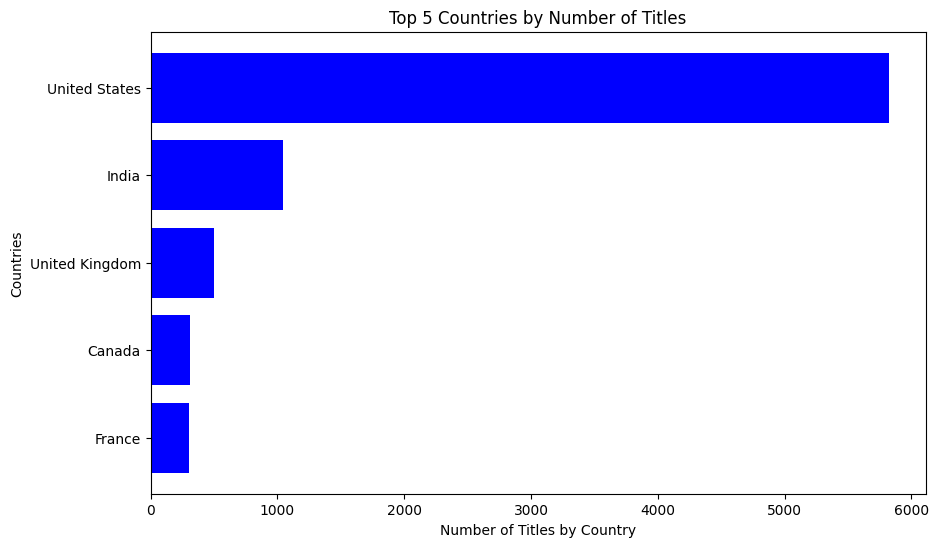

In [ ]:
# Group by country and count the number of distinct titles
df_country = df_final.groupby(['country']).agg({"title": "nunique"}).reset_index()

# Sort the values by the number of titles in descending order
df_country = df_country.sort_values(by="title", ascending=True)

# Select the top 5 countries
df_country_top_5 = df_country.tail(5)

# Plot horizontal bar chart for the top 5 countries
plt.figure(figsize=(10,6))
plt.barh(df_country_top_5['country'], df_country_top_5['title'], color='blue')
plt.xlabel('Number of Titles by Country')
plt.ylabel('Countries')
plt.title('Top 5 Countries by Number of Titles')
plt.show()


US,India,UK,Canada and France are leading countries in Content Creation on Netflix

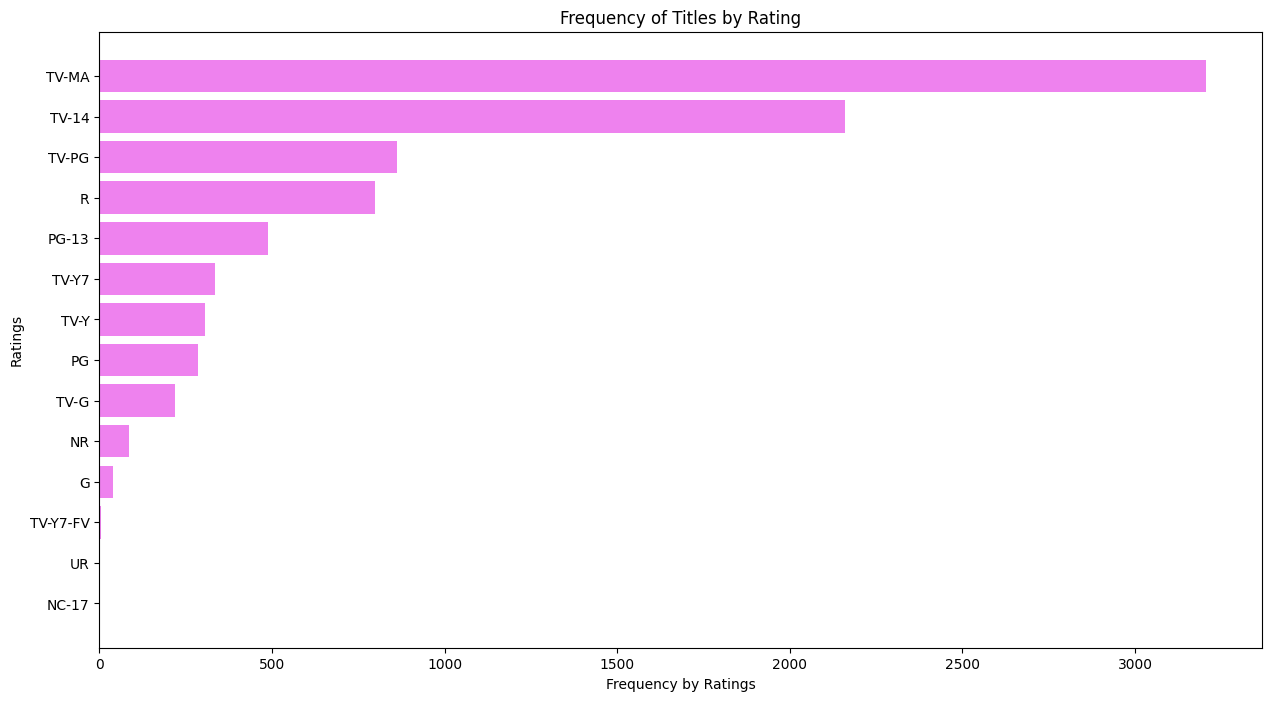

In [ ]:
# Group by rating and count the number of distinct titles
df_rating = df_final.groupby(['rating']).agg({"title": "nunique"}).reset_index()

# Sort the values by the number of titles in descending order
df_rating = df_rating.sort_values(by="title", ascending=True)

# Plot horizontal bar chart for the ratings and their frequencies
plt.figure(figsize=(15,8))
plt.barh(df_rating['rating'], df_rating['title'], color='violet')
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.title('Frequency of Titles by Rating')
plt.show()


Most of the highly rated content on Netflix is intended for Mature Audiences, R Rated, content not intended for
audience under 14 and those which require Parental Guidance


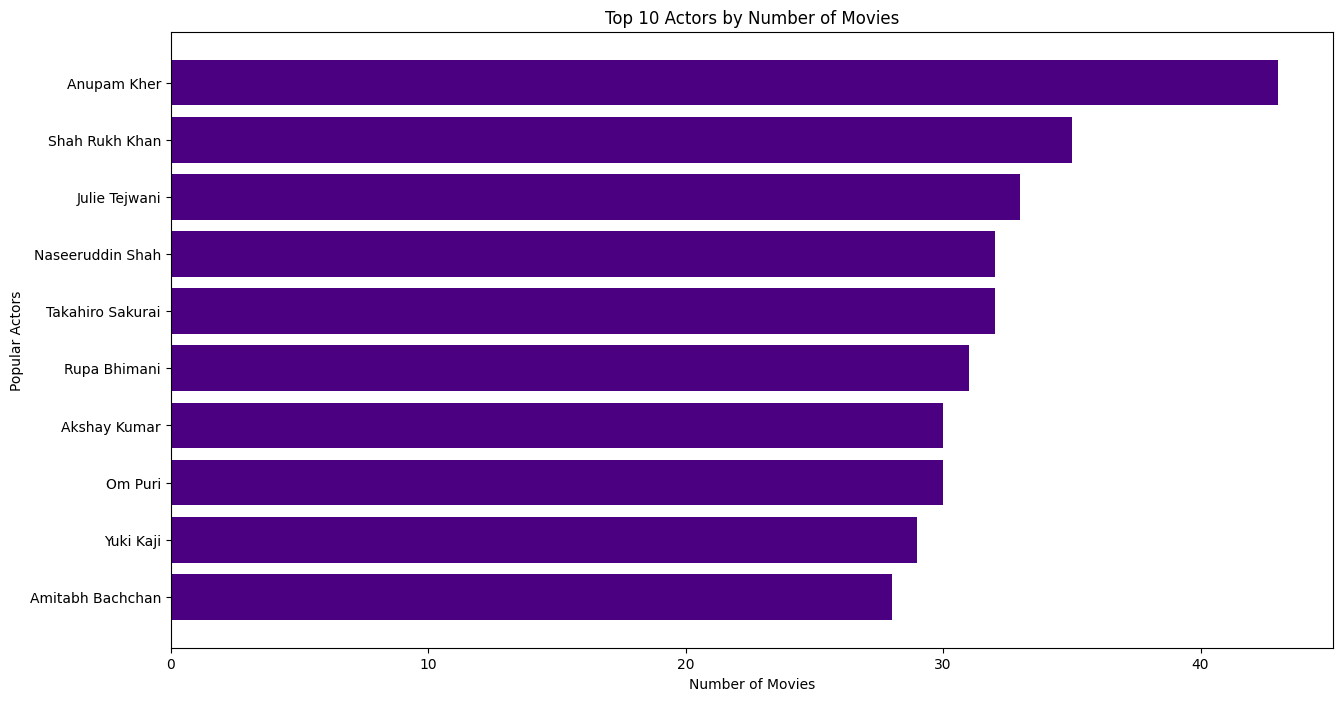

In [ ]:
df_actors = df_final.groupby(['Actors']).agg({"title": "nunique"}).reset_index()
df_actors = df_actors[df_actors['Actors'] != 'Unknown Actor']

df_actors = df_actors[df_actors['Actors'] != 'Unknown Actor']
df_actors = df_actors.sort_values(by="title", ascending=False)

plt.figure(figsize=(15,8))
plt.barh(df_actors['Actors'][:10][::-1], df_actors['title'][:10][::-1], color='indigo')
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.title('Top 10 Actors by Number of Movies')
plt.show()

Anupam Kher,SRK,Julie Tejwani, Naseeruddin Shah and Takahiro Sakurai occupy the top stop in Most
Watched content

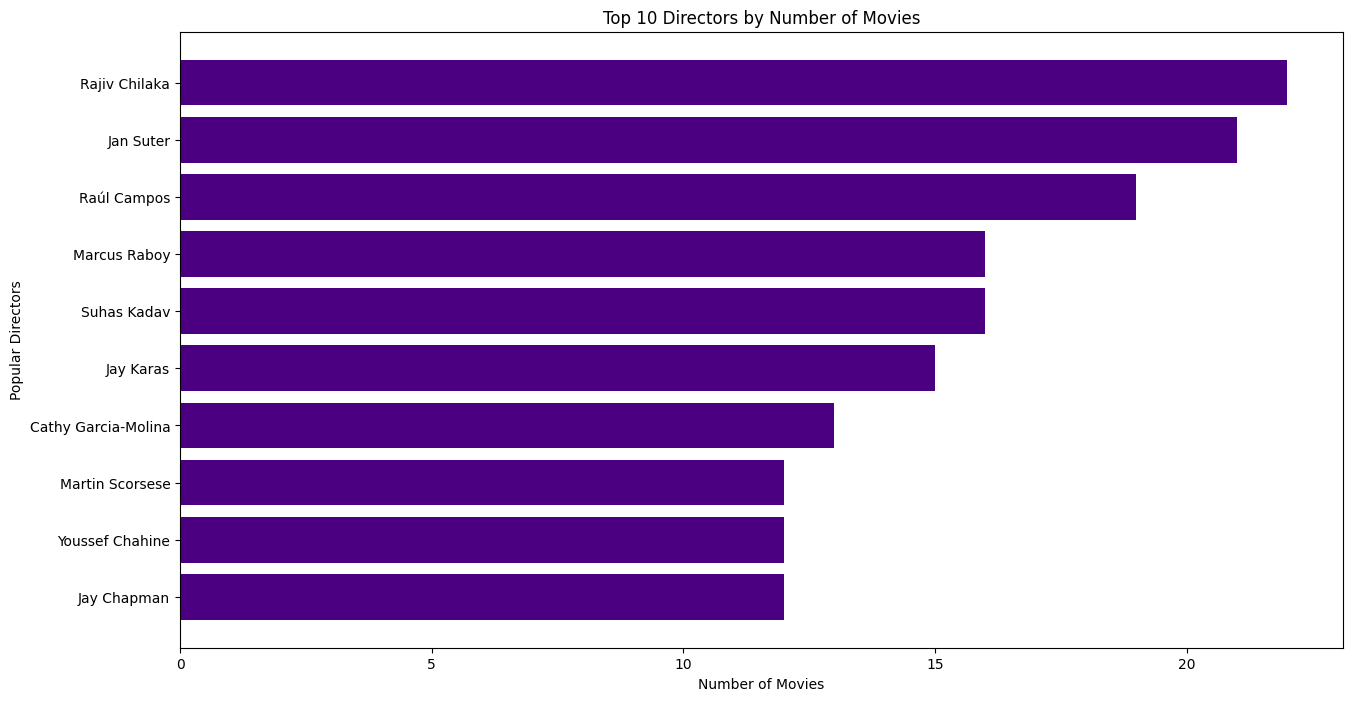

In [ ]:
# Group by Directors and count the number of distinct titles
df_directors = df_final.groupby(['Directors']).agg({"title": "nunique"}).reset_index()

# Filter out 'Unknown Director' and sort the data by the number of titles in descending order
df_directors = df_directors[df_directors['Directors'] != 'Unknown Director']
df_directors = df_directors.sort_values(by="title", ascending=False)

# Plot horizontal bar chart for directors and their number of movies
plt.figure(figsize=(15,8))
plt.barh(df_directors['Directors'][:10][::-1], df_directors['title'][:10][::-1], color='indigo')  # Top 10 directors
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.title('Top 10 Directors by Number of Movies')
plt.show()


Rajiv Chilaka, Jan Suter and Raul Campos are the most popular directors across Netflix

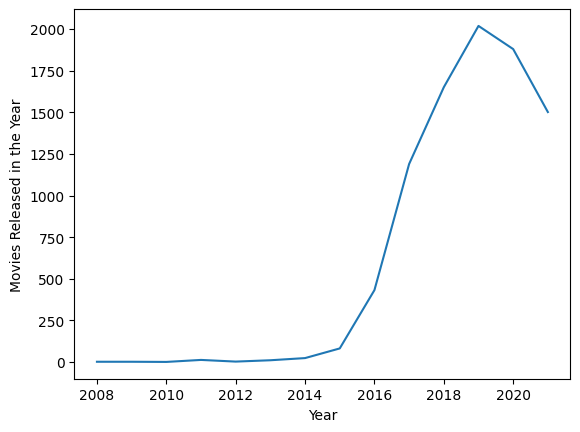

In [ ]:
df_year=df_final.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

The Amount of Content across Netflix has increased from 2008 continuously till 2019. Then started decreasing
from here(probably due to Covid)

In [ ]:
df_final.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_added,year,has_non_digit
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,2021-09-25,9,38,2021,False
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,230s,2021-09-24,9,38,2021,True
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,230s,2021-09-24,9,38,2021,True
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,230s,2021-09-24,9,38,2021,True
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,United States,s2,TV Show,"September 24, 2021",2021,TV-MA,230s,2021-09-24,9,38,2021,True


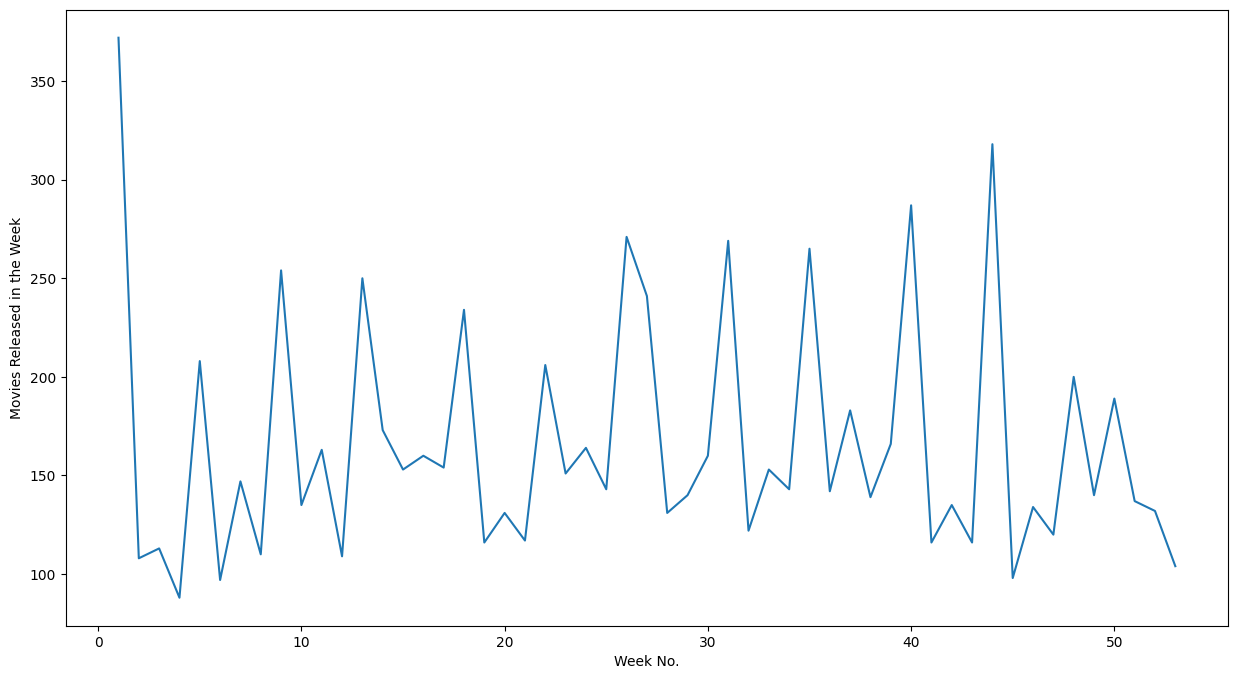

In [ ]:
#weekliy data
df_week=df_final.groupby(['week_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

Most of the Content across Netflix is added in the first week of the year and it follows a bit of a cyclical pattern


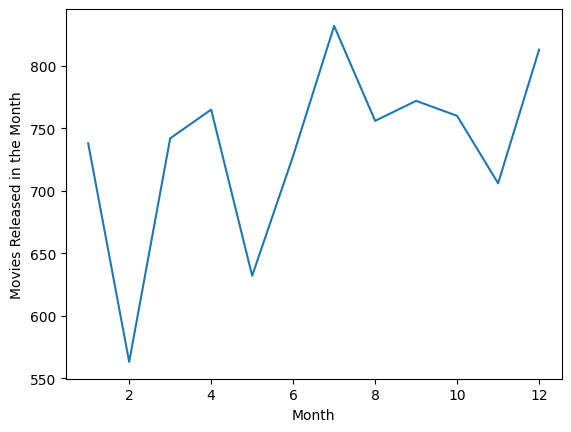

In [ ]:
df_month=df_final.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

Most of the content is added in the first and last months across Netflix


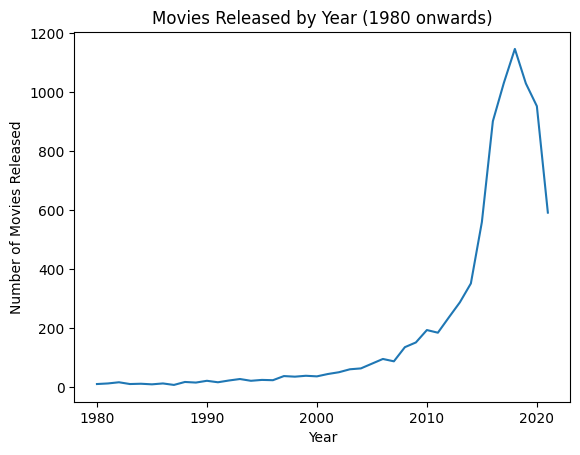

In [ ]:
# Filter the dataframe for release years 1980 and above
df_release_year = df_final[df_final['release_year'] >= 1980]

# Group by release_year and count the number of movies released each year
df_release_year_count = df_release_year.groupby('release_year').agg({'title': 'nunique'}).reset_index()

# Plotting the line plot for the number of movies released by year
sns.lineplot(data=df_release_year_count, x='release_year', y='title')
plt.ylabel("Number of Movies Released")
plt.xlabel("Year")
plt.title("Movies Released by Year (1980 onwards)")
plt.show()


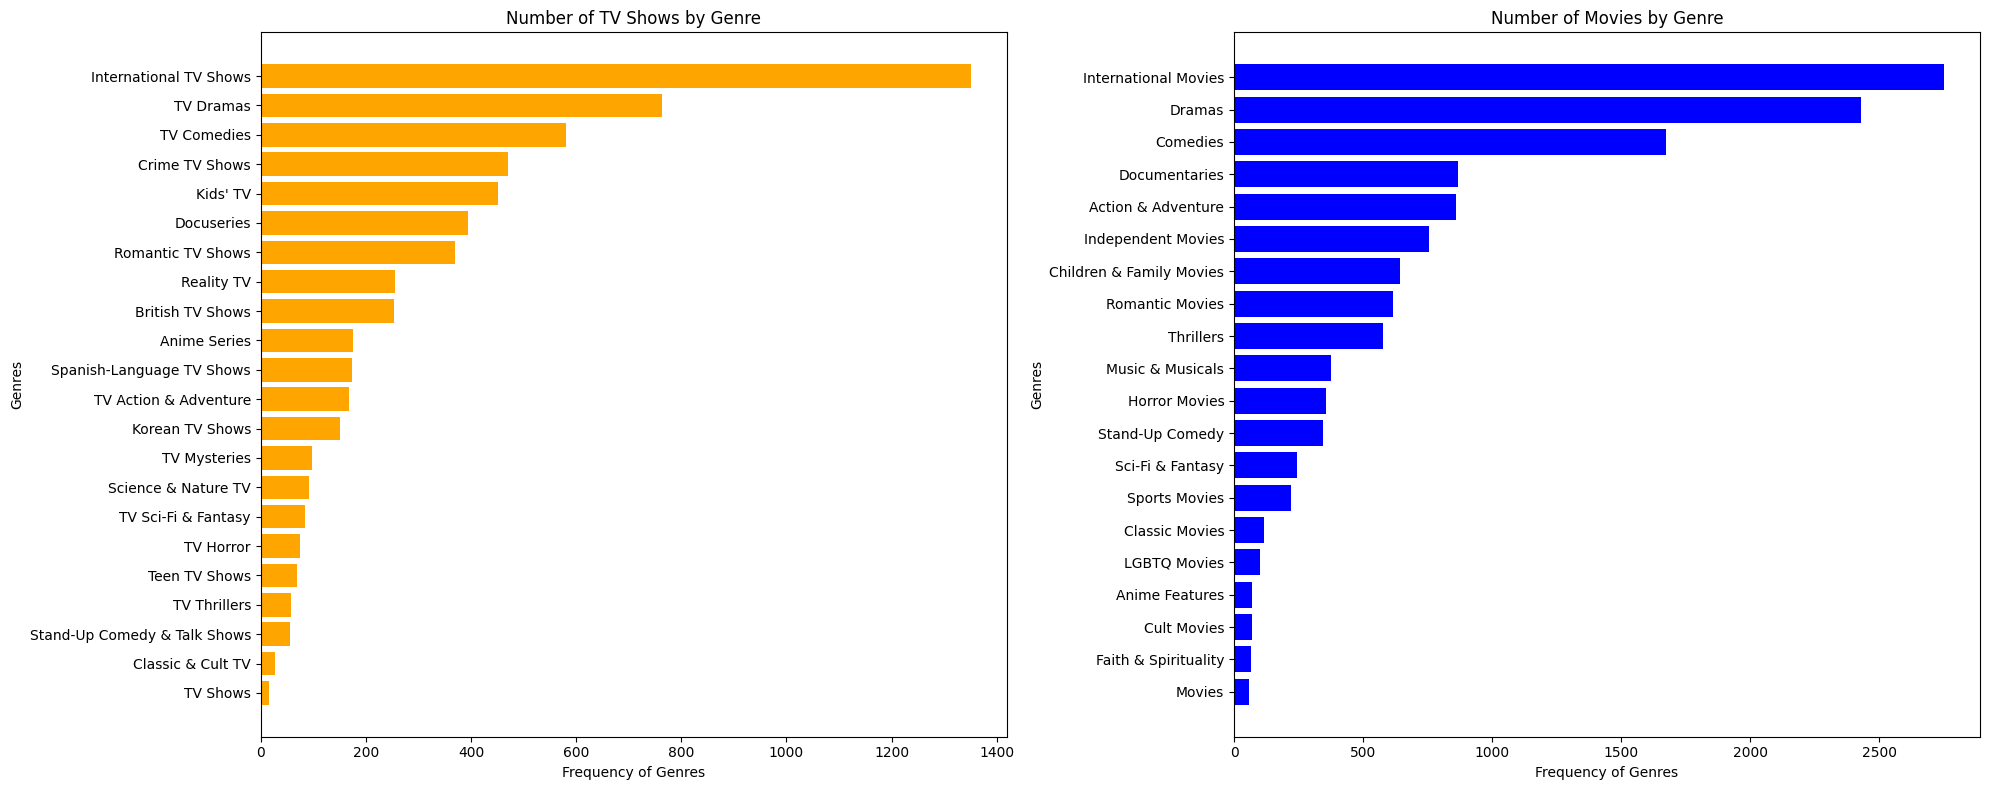

In [ ]:
# Grouping TV Shows by Genre and counting the number of unique titles
df_genre_tv = tv_shows_df.groupby(['Genre']).agg({"title": "nunique"}).reset_index()
df_genre_tv = df_genre_tv.sort_values(by='title', ascending=False)

# Grouping Movies by Genre and counting the number of unique titles
df_genre_movies = movies_df.groupby(['Genre']).agg({"title": "nunique"}).reset_index()
df_genre_movies = df_genre_movies.sort_values(by='title', ascending=False)

# Creating a subplot with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plotting TV Shows Genre Distribution
ax[0].barh(df_genre_tv[::-1]['Genre'], df_genre_tv[::-1]['title'], color='orange')
ax[0].set_xlabel('Frequency of Genres')
ax[0].set_ylabel('Genres')
ax[0].set_title('Number of TV Shows by Genre')

# Plotting Movies Genre Distribution
ax[1].barh(df_genre_movies[::-1]['Genre'], df_genre_movies[::-1]['title'], color='blue')
ax[1].set_xlabel('Frequency of Genres')
ax[1].set_ylabel('Genres')
ax[1].set_title('Number of Movies by Genre')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


International TV Shows, Dramas and Comedy Genres are popular across TV Shows in Netflix

International Movies, Dramas and Comedy Genres are popular followed by Documentaries across Movies on
Netflix

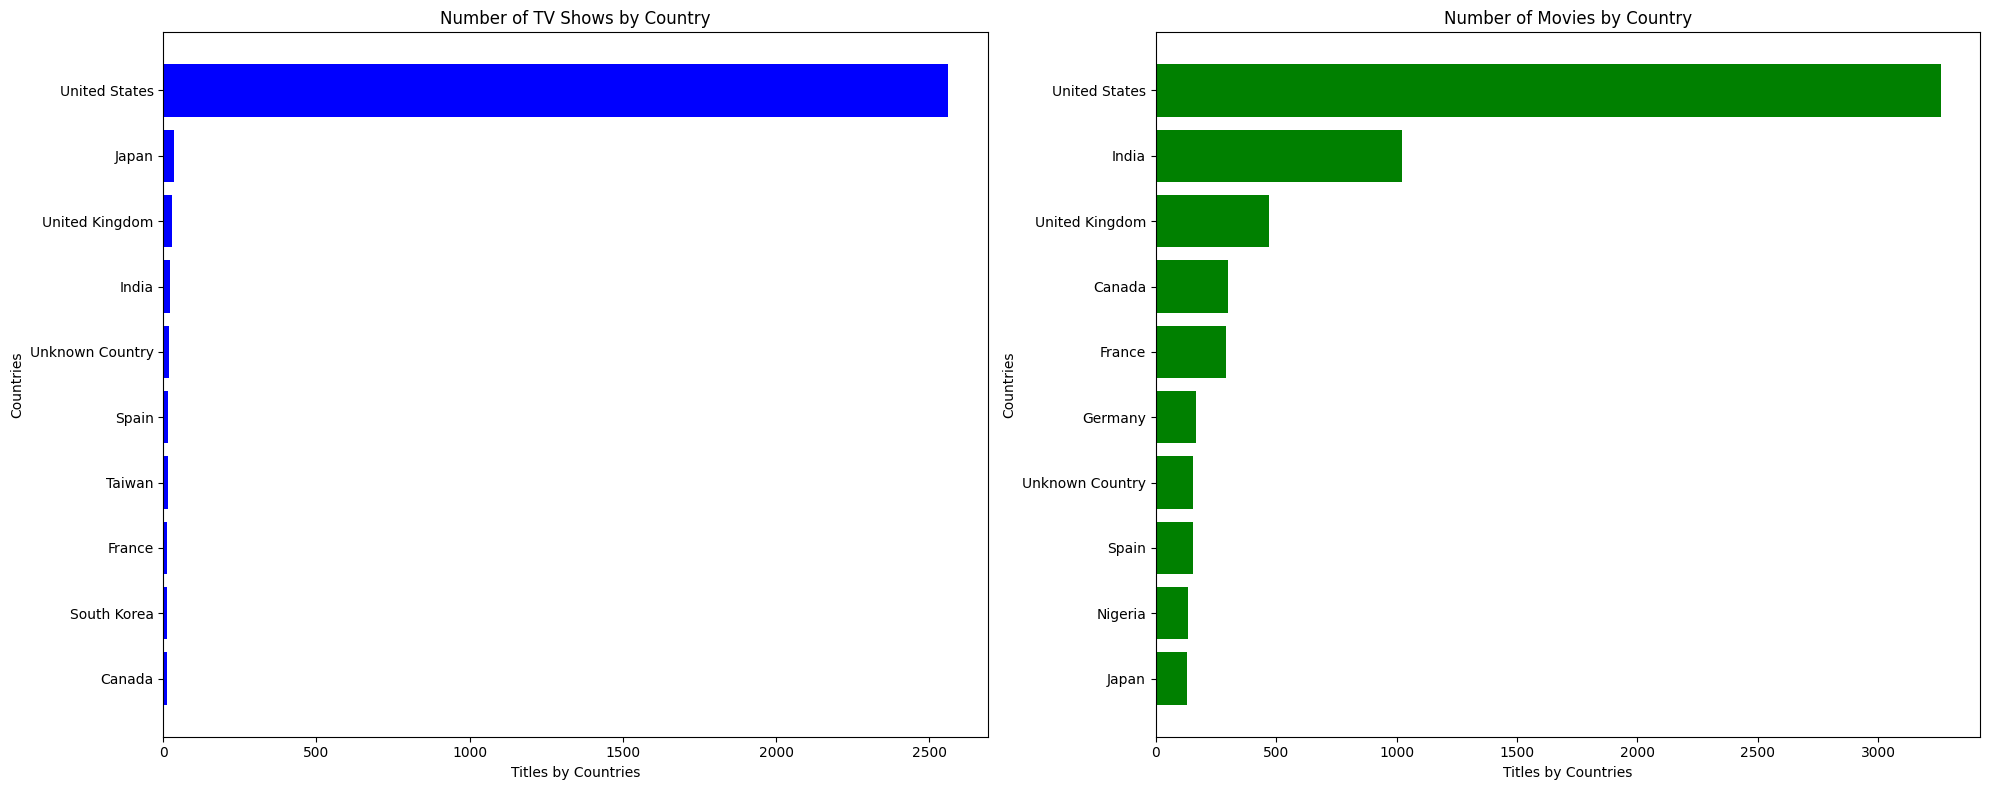

In [ ]:
# Group by country and count the unique titles (TV Shows)
df_country_shows = tv_shows_df.groupby(['country']).agg({"title": "nunique"}).reset_index()

# Sort the countries by the number of titles in descending order
df_country_shows = df_country_shows.sort_values(by='title', ascending=False).head(10)

# Group by country and count the unique titles (Movies)
df_country_movies = movies_df.groupby(['country']).agg({"title": "nunique"}).reset_index()

# Sort the countries by the number of titles in descending order
df_country_movies = df_country_movies.sort_values(by='title', ascending=False).head(10)

# Create subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plot Number of TV Shows by Country (Left Chart)
ax[0].barh(df_country_shows[::-1]['country'], df_country_shows[::-1]['title'], color=['blue'])
ax[0].set_xlabel('Titles by Countries')
ax[0].set_ylabel('Countries')
ax[0].set_title('Number of TV Shows by Country')

# Plot Number of Movies by Country (Right Chart)
ax[1].barh(df_country_movies[::-1]['country'], df_country_movies[::-1]['title'], color=['green'])
ax[1].set_xlabel('Titles by Countries')
ax[1].set_ylabel('Countries')
ax[1].set_title('Number of Movies by Country')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


United States is leading across both TV Shows and Movies, UK also provides great content across TV Shows
and Movies. Surprisingly India is much more prevalent in Movies as compared TV Shows.
Moreover the number of Movies created in India outweigh the sum of TV Shows and Movies across UK since
India was rated as second in net sum of whole content across Netflix.